In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, \
mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [2]:
#read in the data with pandas
df= pd.read_csv('Loan_Modelling.csv')

In [3]:
#keeping a copy of the data
data = df.copy()

In [4]:
# now having a look at the data
df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


The details of the columns are as follows:
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



In [5]:
#check for the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
#check for null or missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
##checking duplicated values, we have no duplicated values
data.duplicated().sum()

0

Visualising and checking the descriptive statistics of my data

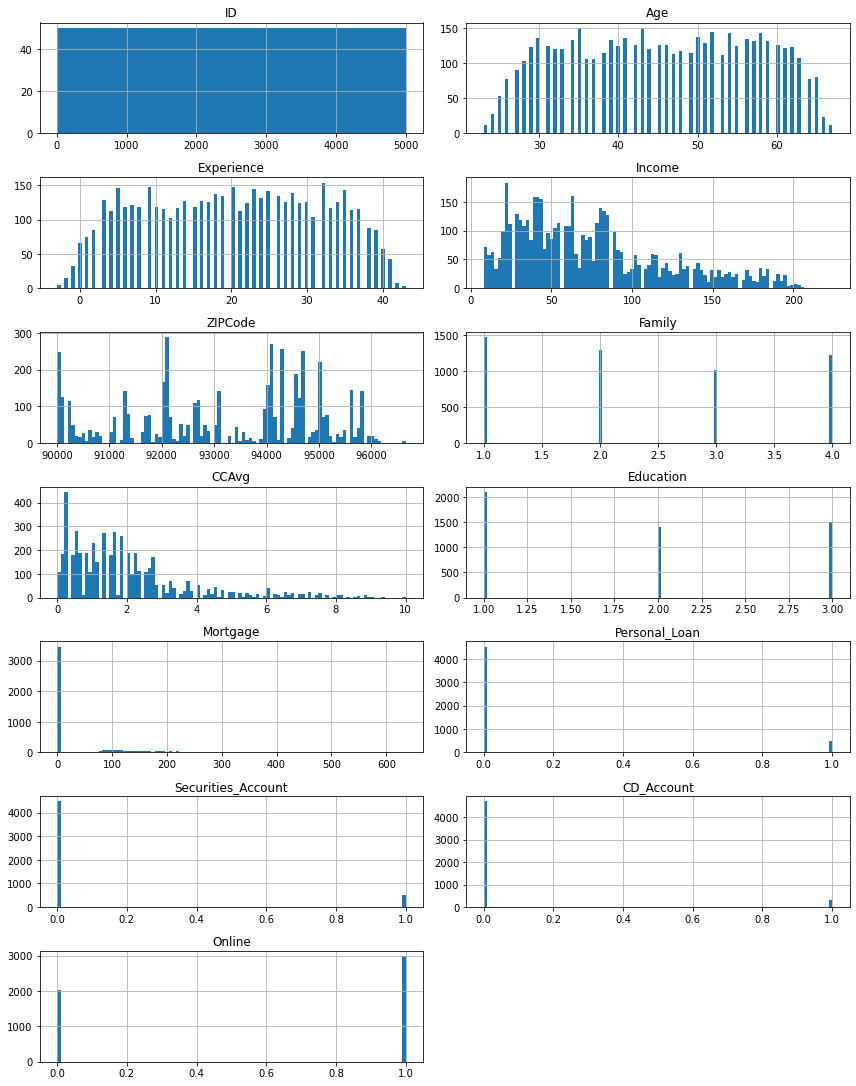

In [8]:
#selecting all columnbs except the target variable
columns = list(df)[:-1]

df[columns].hist(stacked = False, bins = 100, figsize = (12,30), layout = (14, 2));

#the titles are overlapping, the code below will fix it
plt.tight_layout();

We have a clean data set as there is no null/missing values  and they are of the appropriate datatypes. Now, we will check the unique values of each columns in our dataframe

In [9]:
#checking the unique values of Age
df['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [10]:
#checking the unique values of Experience
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

We have invalid entries in experience columns, such as negative entries, ill replace the rows with the negative entries with the positive experience so as to retain as much data as this might be a mistake

In [11]:
#replaving the entries with negative entries                            
for x in df.index:
    if df.loc[x, "Experience"] == -1:
        df.loc[x, "Experience"] = 1
    if df.loc[x, "Experience"] == -2:
        df.loc[x, "Experience"] = 2
    elif df.loc[x, "Experience"] == -3:
        df.loc[x, "Experience"] = 3

In [12]:
#checking the unique values of Experience, we no longer have negative years of experiences
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

In [13]:
#checking the unique values of Income
df['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [14]:
#checking the unique values of ZIPCode
#df['ZIPCode'].unique()

In [15]:
#checking the unique values of Family
df['Family'].unique()

array([4, 3, 1, 2], dtype=int64)

In [16]:
#checking the unique values of CCAvg
df['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [17]:
#checking the unique values of Education
df['Education'].unique()

array([1, 2, 3], dtype=int64)

In [18]:
#checking the unique values of Mortgage
df['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [19]:
#checking the unique values of Personal_Loan, where 1 customer accepted the personal loan offered in the last campaign and 0, didnot
df['Personal_Loan'].unique()

array([0, 1], dtype=int64)

In [20]:
#checking the unique values of Securities_Account,where 1 the customer have securities account with the bank and 0, doesnt
df['Securities_Account'].unique()

array([1, 0], dtype=int64)

In [21]:
#checking the unique values of CD_Account, where 1means the customer has a certificate of deposit (CD) account with the bank and 0 he/she doesnt
df['CD_Account'].unique() 

array([0, 1], dtype=int64)

In [22]:
#checking the unique values of CreditCard, where 0 represents doesnt use a credit card issued by any other Bank and 1 does
df['CreditCard'].unique() 

array([0, 1], dtype=int64)

In [23]:
#checking the unique values of Online
df['Online'].unique() 

array([0, 1], dtype=int64)

In [24]:
## lets see how correlated the variables are
df.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.030837,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030837,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.008304,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


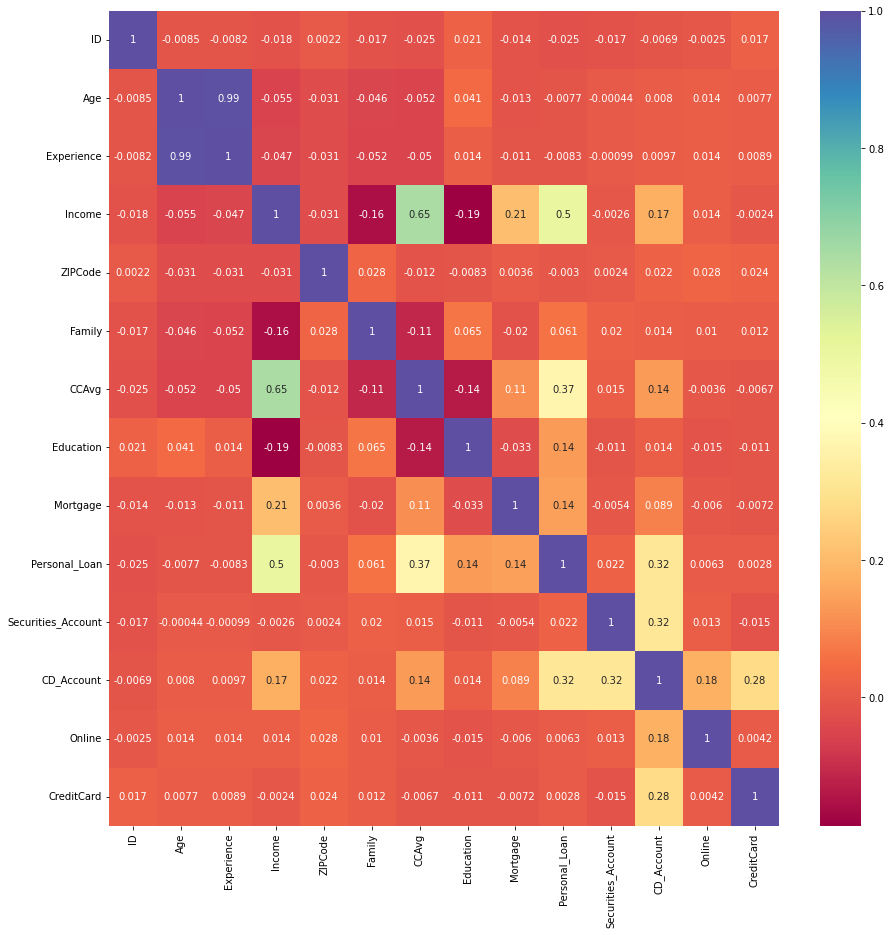

In [25]:
# plotting correlation heatmap
plt.figure(figsize = (15, 15))
dataplot = sns.heatmap(df.corr(), cmap="Spectral", annot=True)
  
# displaying heatmap
plt.show()

From the correlation map above, Age and experience are highly correlated at 99.4%, CCAvg and Income are quite correlated too with 65%

Also from the cprrelation plt above, the follwing variables are more important or correlate fairly well with personal loan i.e INCOME, CCAvg, CD account with 50.2, 36.7 and 31.2 % respectively

In [26]:
#dropping the target variable, which is the loan
X = df.drop(['Personal_Loan'], axis =1)
Y=df['Personal_Loan']

In [27]:
X

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [28]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal_Loan, Length: 5000, dtype: int64

In [29]:
#splitting the data sets into test,validation and train
X_train_val,X_test,Y_train_val,Y_test = train_test_split(X,Y, test_size = 0.2,random_state =0, stratify = Y)

X_train,X_val,Y_train,Y_val = train_test_split(X_train_val,Y_train_val, test_size = 0.2,random_state =0, stratify = Y_train_val)


In [30]:
#Checking the test and train shape
X_test.shape

(1000, 13)

In [31]:
#Checking the test,validation and train shape
X_train.shape

(3200, 13)

In [32]:
#Checking the test,validation and train shape
X_val.shape

(800, 13)

In [33]:
#checking the descriptive statistics of the data
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [34]:
#we will now normalize our data with the standard scaler before building the model
#creating an instance for standardscaler()
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [35]:
#creating instance for logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train_sc, Y_train)

LogisticRegression()

In [36]:
#checking the coefficients of the log_reg
log_reg.coef_

array([[-0.0501442 , -0.36802223,  0.44044496,  2.39028695, -0.03116981,
         0.74046135,  0.21398235,  1.42554791, -0.01585832, -0.26631186,
         0.90364992, -0.33172725, -0.47324104]])

In [37]:
#checking the accuracy score
print('Train Accuracy: {:.4f}'.format(log_reg.score(X_train_sc,Y_train)))
print('Test Accuracy: {:.4f}'.format(log_reg.score(X_test_sc,Y_test)))

Train Accuracy: 0.9519
Test Accuracy: 0.9540


This model will ptredictly correctly 95% of the time which customer will njuy a liability loan

In [38]:
#To check our r2 score, we need to make predictions first
pred = log_reg.predict(X_test_sc)
r2_score(Y_test, pred)

0.46994837758112085

###### The R2 score of this model is 46.99%

In [39]:
#we will now make predictions to check our error
predict_train = log_reg.predict(X_train_sc)
predict_test = log_reg.predict(X_test_sc)

In [40]:
#checking the mean squared error
print('Train error: {:.4f}'.format(mean_squared_error(Y_train,predict_train)))
print('Test error: {:.4f}'.format(mean_squared_error(Y_test,predict_test)))

Train error: 0.0481
Test error: 0.0460


The model makes an error of 0.047 with each prediction

We will now use Confusion Matrix metrics such as precision_score, recall and f1 score to check/evaluate our model to be sure it isnt bias

In [41]:
#to check our precision score, we will first make predictions
test_predict = log_reg.predict(X_test_sc)
precision = precision_score(Y_test, test_predict)

In [42]:
precision

0.8289473684210527

This means all the time this model makes predictions, 82.9% are accurate in the prediction

In [43]:
#we will now look at our recall score
recall = recall_score(Y_test, test_predict)

In [44]:
recall

0.65625

This shows that the machine learning model correctly identifies/ predicts 65.62% as belonging to a class of interest—the “positive class”—out of the total samples for that class.

# Decision tree model building

In [45]:
from sklearn.tree import DecisionTreeClassifier


In [46]:
dtree = DecisionTreeClassifier(random_state = 0)

In [47]:
#function to train a model and compute train accuracy

def train(model, X, y):
    trained_model = model. fit(X, y)
    preds = trained_model.predict (X)
    acc = accuracy_score (y, preds) 
    print (f"Train Accuracy: {acc}")
    return trained_model

def evaluate(model, X, y, threshold =0.5):
    pred_proba = model.predict_proba (X) [:, 1]
    pred_class = np.round(pred_proba > threshold) # convert to 0 or 1
    acc = accuracy_score(y, pred_class)
    recall = recall_score (y, pred_class)
    precision = precision_score(y, pred_class)
    f1 = f1_score(y, pred_class)

# create a dataframe for the metrics

    df =pd.DataFrame ( {

        "Accuracy": acc,

        "precision": precision,

        "Recall": recall,

        "F1": f1

}, index = [0])

#

#compute the confusion matrix
#     confusion_matrix = metrics.confusion_matrix(y, pred_class)
#     disp = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels [0, 1])
#     disp.plot() 
#     plt.show()

    actual = np.random.binomial(1,.9,size = 800)
    predicted = np.random.binomial(1,.9,size = 800)

    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()

In [48]:
dtree_model = train(dtree, X_train, Y_train)

Train Accuracy: 1.0


This decision tree model has an accuracy of 1, thats overfitting, lets check our evaluate function

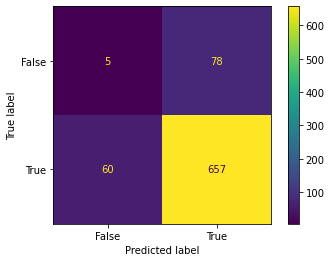

In [49]:
dtree_df = evaluate(dtree, X_val, Y_val)
dtree_df

From the earlier questions we have been put up to,
Which variables are most significant; the follwing variables are more important or correlate fairly well with personal loan i.e INCOME, CCAvg, CD account with 50.2, 36.7 and 31.2 % respectively
Which segment of customers should be targeted more.

In [52]:
#we will now check which class is the majority or minority, the customers that didnt accept the personal loan offered in the last campaign are the majority class therefore they should be targeted more
df['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

The customers that didnt accept the personal loan offered in the last campaign are the majority class therefore they should be targeted more. 


Recommendations.
1. all life banks should focus The customers that didnt accept the personal loan offered in the last campaign are the majority class therefore they should be targeted more. 
2. Customers with higher icome and CCavg are more likely to buy the loan so they should be focused on.
3. The number of customers who are also borrowers (asset customers)  should be invested in mostly